In [1]:
#Este es un codigo que extrae datos de modis

#-----Librerias y funciones--------------------
import os
from modis_tools import lee_archivo,hora_archivo,fecha_archivo
from modis_tools import extrae_datos_hdf,indice_nbr
from interpolacion import interpolate_data
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

#-------Lectura------------------

print('Iniciando lectura de archivo')


file_data = 'abril.hdf'

folder_data = '/home/user/Escritorio/DATOS_POSTA/6abril/archivo'

file_geo = 'abril_geo.hdf'

folder_geo = '/home/user/Escritorio/DATOS_POSTA/6abril/geolocation'

path_data = os.path.join(folder_data,file_data)

path_geo = os.path.join(folder_geo,file_geo)

print('Archivo leido correctamente')

#-----Apertura de datos----------------


var = lee_archivo(path_data)
geo = lee_archivo(path_geo)

#---Extraigo variables----------

print('Inicializando extraccion de variables')


#Hora y fecha
time = hora_archivo(var)
date = fecha_archivo(var)

#Latitud y longitud
latitude = extrae_datos_hdf(geo,"Latitude")[0]
longitude = extrae_datos_hdf(geo,"Longitude")[0]

#Calculamos Indice normalizado de area quemada
nbr_index = indice_nbr(var,"EV_500_Aggr1km_RefSB","band_names")


print('Extraccion de variables finalizada')
#------Interpolacion

print('Comenzando interpolacion')

algo= interpolate_data(longitude,latitude,nbr_index)

print('Interpolacion finalizada')

#---Guardamos el archivo

#print('Inicializando almacenamiento')

#output_path = f'/home/user/Escritorio/DATOS_POSTA/output_matrices/{time}-{date}.npz'
#np.savez(output_path,longitud = lon, latitud = lat , variable = nbr)

#print('Almacenamiento finalizado')

####------
#print('Proceso finalizado')

#print(algo[0])

Iniciando lectura de archivo
Archivo leido correctamente
Inicializando extraccion de variables
Extraccion de variables finalizada
Comenzando interpolacion
Interpolacion finalizada


In [8]:
type(algo)

tuple

In [23]:
#Este es un codigo que extrae datos de modis

#-----Librerias y funciones--------------------
import os
from modis_tools import lee_archivo,hora_archivo,fecha_archivo
from modis_tools import extrae_datos_hdf,indice_nbr
from interpolacion import interpolate_data
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from scipy.interpolate import griddata


#-------Lectura------------------

print('Iniciando lectura de archivo')


file_data = 'abril.hdf'

folder_data = '/home/user/Escritorio/DATOS_POSTA/6abril/archivo'

file_geo = 'abril_geo.hdf'

folder_geo = '/home/user/Escritorio/DATOS_POSTA/6abril/geolocation'

path_data = os.path.join(folder_data,file_data)

path_geo = os.path.join(folder_geo,file_geo)

print('Archivo leido correctamente')

#-----Apertura de datos----------------


var = lee_archivo(path_data)
geo = lee_archivo(path_geo)

#---Extraigo variables----------

print('Inicializando extraccion de variables')


#Hora y fecha
time = hora_archivo(var)
date = fecha_archivo(var)

#Latitud y longitud
latitude = extrae_datos_hdf(geo,"Latitude")[0]
longitude = extrae_datos_hdf(geo,"Longitude")[0]

#Calculamos Indice normalizado de area quemada
nbr_index = indice_nbr(var,"EV_500_Aggr1km_RefSB","band_names")


print('Extraccion de variables finalizada')
#------Interpolacion

#print('Comenzando interpolacion')

#algo= interpolate_data(longitude,latitude,nbr_index)

#print('Interpolacion finalizada')

#---Guardamos el archivo

#print('Inicializando almacenamiento')

#output_path = f'/home/user/Escritorio/DATOS_POSTA/output_matrices/{time}-{date}.npz'
#np.savez(output_path,longitud = lon, latitud = lat , variable = nbr)

#print('Almacenamiento finalizado')

####------
#print('Proceso finalizado')

#print(algo[0])

x_p = np.reshape(longitude, longitude.size)  #vuelvo array de 1D
y_p = np.reshape(latitude, latitude.size)  #idem


#busco los maximos y mínimos de este lon-lat para despues armar la nueva grilla
xmin,xmax,ymin,ymax = min(x_p),max(x_p),min(y_p),max(y_p)

#size of 1 m grid
    # Generate a regular grid to interpolate the data.
#genero la nueva grilla
xi = np.arange(xmin, xmax, 0.01)#, endpoint=False)
yi = np.arange(ymin, ymax, 0.01)
xi, yi = np.meshgrid(xi, yi)


# points = np.array([x_p, y_p]).shape
# Los valores originales de NBR a interpolar
values = np.reshape(nbr_index, nbr_index.size)  #aca lo vuelvo un array de 1D para entrarlo en la funcion
values.shape

matriz = griddata((x_p, y_p), values, (xi, yi),method='linear')

Iniciando lectura de archivo
Archivo leido correctamente
Inicializando extraccion de variables
Extraccion de variables finalizada


/home/user/anaconda3/envs/senso_remoto/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/home/user/anaconda3/envs/senso_remoto/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


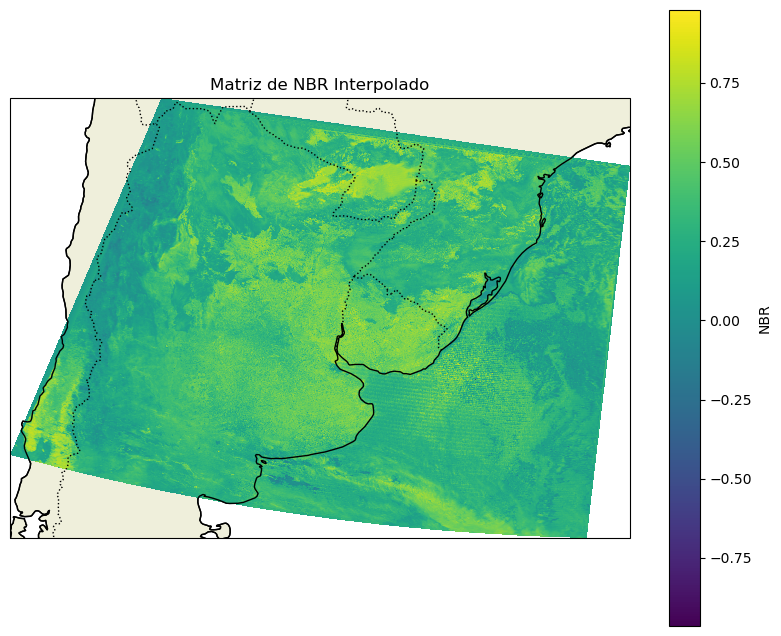

In [31]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plotear la matriz interpolada como una imagen en el mapa
cax = ax.pcolormesh(xi, yi, matriz, transform=ccrs.PlateCarree(), shading='auto')

# Agregar características del mapa
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')

# Agregar barra de colores
cbar = plt.colorbar(cax, orientation='vertical', label='NBR')

# Configurar título y etiquetas
plt.title('Matriz de NBR Interpolado')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el mapa
plt.show()







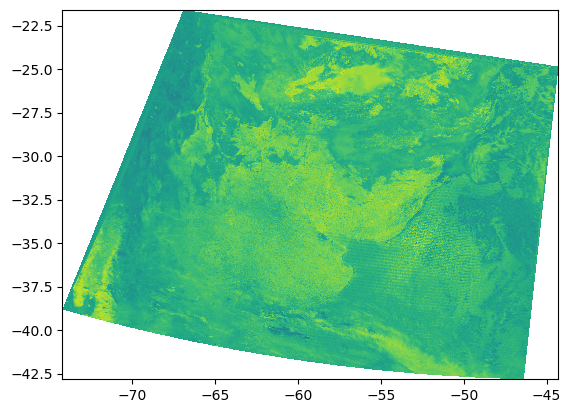

In [30]:
plt.pcolormesh(xi, yi, matriz, shading='auto')


In [28]:
from scipy.interpolate import griddata


In [ ]:
x_p = np.reshape(bef_fire_lon, bef_fire_lon.size)  #vuelvo array de 1D
y_p = np.reshape(bef_fire_lat, bef_fire_lat.size)  #idem
# points = np.array([x_p, y_p]).shape
# Los valores originales de NBR a interpolar
values = np.reshape(bef_fire_nbr, bef_fire_nbr.size)  #aca lo vuelvo un array de 1D para entrarlo en la funcion
values.shape

bef_int_fire_nbr = griddata((x_p, y_p), values, (xi, yi),method='linear')

In [19]:
print(matriz)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
